In [ ]:
!pip install gensim
!pip instal tensorflow
import nltk
nltk.download('punkt_tab')

In [5]:
import pandas as pd
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [15]:
train = pd.read_csv('../../data/yelp/train_en.txt', sep='\t')
test= pd.read_csv('../../data/yelp/test_en.txt', sep='\t')
val = pd.read_csv('../../data/yelp/val_en.txt', sep='\t')
train['Tokens'] = train['Sentence'].apply(lambda x: word_tokenize(x.lower()))
test['Tokens'] = test['Sentence'].apply(lambda x: word_tokenize(x.lower()))
val['Tokens'] = val['Sentence'].apply(lambda x: word_tokenize(x.lower()))

#### Word2Vec SkipGram Model Training

In [17]:
sentences = train['Tokens'].values
sentences

array([list(['cute', 'interior', 'and', 'owner', '(', '?', ')', 'gave', 'us', 'tour', 'of', 'upcoming', 'patio/rooftop', 'area', 'which', 'will', 'be', 'great', 'on', 'beautiful', 'days', 'like', 'today', '.', 'cheese', 'curds', 'were', 'very', 'good', 'and', 'very', 'filling', '.', 'really', 'like', 'that', 'sandwiches', 'come', 'w', 'salad', ',', 'esp', 'after', 'eating', 'too', 'many', 'curds', '!', 'had', 'the', 'onion', ',', 'gruyere', ',', 'tomato', 'sandwich', '.', 'was', "n't", 'too', 'much', 'cheese', 'which', 'i', 'liked', '.', 'needed', 'something', 'else', '...', 'pepper', 'jelly', 'maybe', '.', 'would', 'like', 'to', 'see', 'more', 'menu', 'options', 'added', 'such', 'as', 'salads', 'w', 'fun', 'cheeses', '.', 'lots', 'of', 'beer', 'and', 'wine', 'as', 'well', 'as', 'limited', 'cocktails', '.', 'next', 'time', 'i', 'will', 'try', 'one', 'of', 'the', 'draft', 'wines', '.']),
       list(['i', "'ve", 'been', 'to', 'this', 'location', 'many', 'times', 'when', 'i', 'lived', 'i

In [18]:
model_word2vec = Word2Vec(sentences, vector_size=100, min_count=15, sg=1)

In [115]:
print(len(model_word2vec.wv.index_to_key))
print(len(model_word2vec.wv.key_to_index.keys()))

27414
27414


#### Word Vector Visualization

In [50]:
words = model_word2vec.wv.index_to_key
word_vectors = model_word2vec.wv.vectors

In [51]:
tsne_2 = TSNE(n_components=2)

In [52]:
word_vectors_2d_50 = tsne_2.fit_transform(word_vectors[:50])

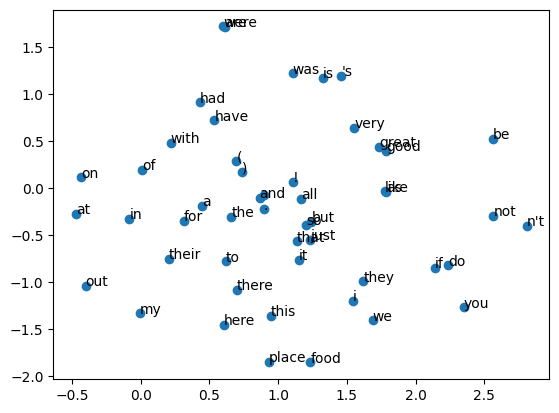

In [53]:
plt.scatter(word_vectors_2d_50[:, 0], word_vectors_2d_50[:, 1])
for label, x, y in zip(words[:50], word_vectors_2d_50[:, 0], word_vectors_2d_50[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.title("SkipGram Word Vectors")
plt.show()

In [54]:
tsne = TSNE(n_components=2)

In [55]:
word_vectors_2d = tsne.fit_transform(word_vectors)

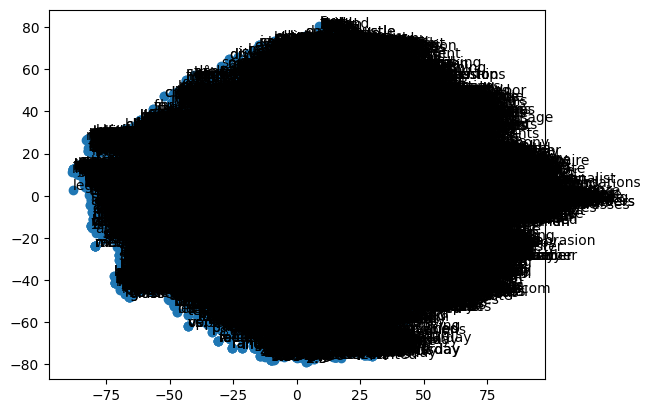

In [56]:
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])
for label, x, y in zip(words, word_vectors_2d[:, 0], word_vectors_2d[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.title("SkipGram Word Vectors")
plt.show()

#### Word Analogies and Similarity Analysis

In [87]:
def find_analogy(word1, word2, word3, model, topn=5):
    return model.wv.most_similar(positive=[word1, word3], negative=[word2], topn=topn)

In [63]:
analogies = [
    ('paris', 'france', 'italy'),
    ('madrid', 'spain', 'france'),
    ('king', 'man', 'woman'),
    ('bigger', 'big', 'cold'),
    ('windows', 'microsoft', 'google')
]

In [74]:
for w1, w2, w3 in analogies:
    result = find_analogy(w1, w2, w3, model_word2vec, topn=5)
    closest_word, score = result[0]
    print(f"\n{w1.capitalize()} - {w2.capitalize()} + {w3.capitalize()} = {closest_word}")
    print(f"Closest word {closest_word}, with a {score:.2f} score.")
    print("Top 5 words:")
    if isinstance(result, list):
        for word, score in result:
            print(f"{word}: {score:.2f}")
    else:
        print(f"{result}")


Paris - France + Italy = nyc
Closest word nyc, with a 0.61 score.
Top 5 words:
nyc: 0.61
naples: 0.60
brooklyn: 0.57
napoli: 0.57
nonna: 0.57

Madrid - Spain + France = sc
Closest word sc, with a 0.70 score.
Top 5 words:
sc: 0.70
colombia: 0.70
portland: 0.69
quincy: 0.69
scotland: 0.69

King - Man + Woman = prussia
Closest word prussia, with a 0.68 score.
Top 5 words:
prussia: 0.68
factory: 0.52
fantasia: 0.50
willow: 0.49
queen: 0.49

Bigger - Big + Cold = colder
Closest word colder, with a 0.66 score.
Top 5 words:
colder: 0.66
warmer: 0.61
hotter: 0.60
cooler: 0.57
saltier: 0.55

Windows - Microsoft + Google = sidewalk
Closest word sidewalk, with a 0.50 score.
Top 5 words:
sidewalk: 0.50
chalkboard: 0.48
exterior: 0.48
awning: 0.47
tunnel: 0.47


#### SkipGram vs CBOW Comparison

In [75]:
model_cbow = Word2Vec(sentences, vector_size=100, min_count=15, sg=0)

In [76]:
len(model_cbow.wv.index_to_key)

27414

In [77]:
words_cbow = model_cbow.wv.index_to_key
word_vectors_cbow = model_cbow.wv.vectors

In [78]:
tsne_cbow = TSNE(n_components=2, random_state=42)
word_vectors_cbow_2d = tsne_cbow.fit_transform(word_vectors_cbow[:50])

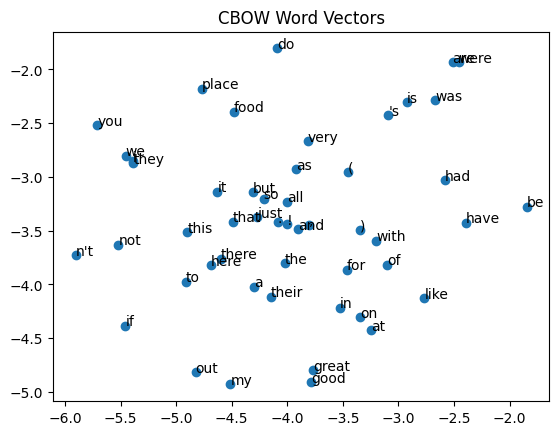

In [86]:
plt.scatter(word_vectors_cbow_2d[:, 0], word_vectors_cbow_2d[:, 1])
for label, x, y in zip(words_cbow[:50], word_vectors_cbow_2d[:, 0], word_vectors_cbow_2d[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.title("CBOW Word Vectors")
plt.show()

In [104]:
def compare(w1, w2, w3, model_sg, model_cbow, topn=5):
    print(f"\n{w1.capitalize()} - {w2.capitalize()} + {w3.capitalize()}")

    # SkipGram
    result_sg = model_sg.wv.most_similar(positive=[w1, w3], negative=[w2], topn=topn)
    print(f"\nTop 5 with SkipGram:")
    for word, score in result_sg:
        print(f"{word}: {score:.2f}")

    # CBOW
    result_cbow = model_cbow.wv.most_similar(positive=[w1, w3], negative=[w2], topn=topn)
    print(f"\nTop 5 with CBOW:")
    for word, score in result_cbow:
            print(f"{word}: {score:.2f}")

    print("=" * 30)

In [105]:
for w1, w2, w3 in analogies:
    compare(w1, w2, w3, model_word2vec, model_cbow, topn=5)


Paris - France + Italy

SkipGram:
nyc: 0.61
naples: 0.60
brooklyn: 0.57
napoli: 0.57
nonna: 0.57

CBOW:
nyc: 0.67
portland: 0.60
miami: 0.59
europe: 0.58
ardmore: 0.57

Madrid - Spain + France

SkipGram:
sc: 0.70
colombia: 0.70
portland: 0.69
quincy: 0.69
scotland: 0.69

CBOW:
sc: 0.64
idaho: 0.61
toronto: 0.61
hermitage: 0.61
centres: 0.61

King - Man + Woman

SkipGram:
prussia: 0.68
factory: 0.52
fantasia: 0.50
willow: 0.49
queen: 0.49

CBOW:
meijer: 0.42
prussia: 0.42
chantilly: 0.42
mawr: 0.42
earls: 0.40

Bigger - Big + Cold

SkipGram:
colder: 0.66
warmer: 0.61
hotter: 0.60
cooler: 0.57
saltier: 0.55

CBOW:
hotter: 0.74
colder: 0.66
cooler: 0.64
crisper: 0.63
spicier: 0.62

Windows - Microsoft + Google

SkipGram:
sidewalk: 0.50
chalkboard: 0.48
exterior: 0.48
awning: 0.47
tunnel: 0.47

CBOW:
twitter: 0.50
instagram: 0.49
map: 0.47
directions: 0.47
opentable: 0.46


#### Impact of Vector Dimensionality (with SkipGram method)

In [106]:
vector_sizes = [50, 100, 200, 300]
models_by_size = {}

In [108]:
for size in vector_sizes:
    print(f"Model with vector size: {size}")
    models_by_size[size] = Word2Vec(sentences, vector_size=size, min_count=15, sg=1)
    print(f"Words count: {len(models_by_size[size].wv.index_to_key)}")

Model with vector size: 50
Words count: 27414
Model with vector size: 100
Words count: 27414
Model with vector size: 200
Words count: 27414
Model with vector size: 300
Words count: 27414


In [109]:
def compare_vector_sizes(w1, w2, w3, models_dict, topn=5):
    print(f"\n{w1.capitalize()} - {w2.capitalize()} + {w3.capitalize()}")

    for size, model in models_dict.items():
        result = model.wv.most_similar(positive=[w1, w3], negative=[w2], topn=topn)
        print(f"\nVector Size: {size}")
        print(f"Top 5:")
        for word, sc in result:
            print(f"{word}: {sc:.2f}")

    print("=" * 30)

In [110]:
for w1, w2, w3 in analogies:
    compare_vector_sizes(w1, w2, w3, models_by_size, topn=5)


Paris - France + Italy

Vector Size: 50
Top 5:
nyc: 0.66
baguette: 0.66
venice: 0.66
cairo: 0.64
rome: 0.63

Vector Size: 100
Top 5:
collingswood: 0.59
rome: 0.59
nyc: 0.58
ny: 0.56
italian: 0.55

Vector Size: 200
Top 5:
naples: 0.49
rome: 0.48
napoli: 0.48
venice: 0.47
nyc: 0.46

Vector Size: 300
Top 5:
venice: 0.45
rome: 0.43
nonna: 0.40
italian: 0.40
nyc: 0.39

Madrid - Spain + France

Vector Size: 50
Top 5:
florence: 0.82
elmos: 0.81
quincy: 0.81
primanti: 0.81
josef: 0.81

Vector Size: 100
Top 5:
sc: 0.73
oklahoma: 0.69
minneapolis: 0.69
iowa: 0.69
morocco: 0.68

Vector Size: 200
Top 5:
quincy: 0.57
sc: 0.57
dc: 0.55
oc: 0.54
minneapolis: 0.54

Vector Size: 300
Top 5:
sc: 0.55
milan: 0.54
rhode: 0.52
d.c.: 0.52
toledo: 0.52

King - Man + Woman

Vector Size: 50
Top 5:
prussia: 0.74
lux: 0.66
georgetown: 0.65
sheba: 0.65
factory: 0.64

Vector Size: 100
Top 5:
prussia: 0.66
queen: 0.58
willow: 0.52
christiana: 0.50
royal: 0.50

Vector Size: 200
Top 5:
prussia: 0.56
queen: 0.45
georg

The results may vary slightly between runs due to the absence of a fixed random state, but the overall trends and conclusions remain consistent.

#### Conclusions
When comparing SkipGram and CBOW methods, SkipGram successfully identifies the correct analogy in two cases: "colder" (0.66) as the top result for Bigger-Big+Cold and "queen" (0.49) in the top 5 for King-Man+Woman. However, SkipGram completely fails on geographic analogies, producing irrelevant results like "nyc" and "sc" instead of "rome" or "paris." CBOW shows even weaker performance on most analogies- it misses "queen" entirely for King-Man+Woman (showing only "prussia" and unrelated words) and also fails on geographic analogies. The only area where CBOW clearly outperforms SkipGram is the technology analogy (Windows-Microsoft+Google), where CBOW produces relevant tech terms like "twitter" and "instagram" (0.50, 0.49) while SkipGram gives literal interpretations like "sidewalk" and "chalkboard." Regarding vector dimensionality, the results show that smaller vectors (50) produce higher similarity scores but less precise results, while larger vectors show lower scores yet more accurate predictions. For example, "rome" appears more consistently in top positions with higher dimensions for the Paris-France+Italy analogy.